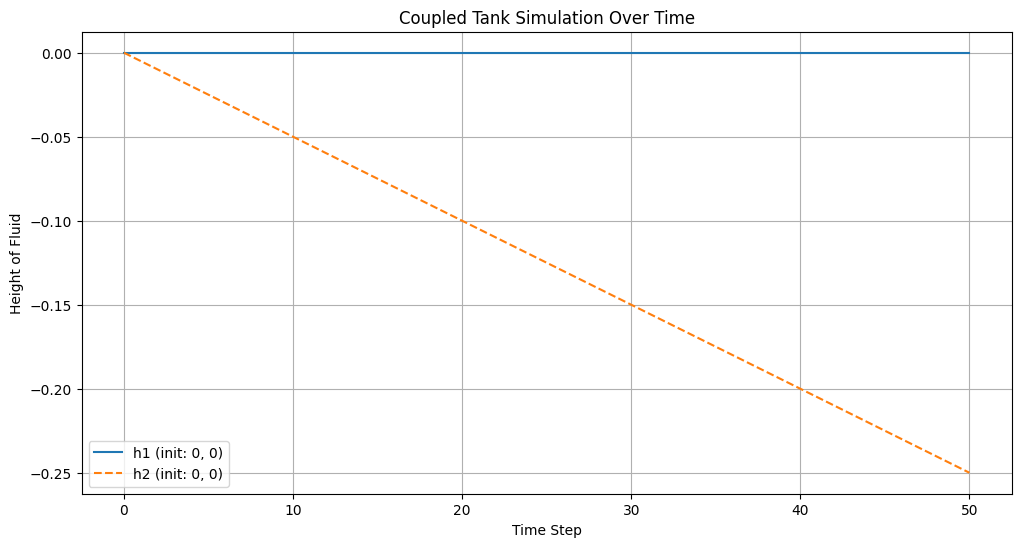

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
A1 = 1.0
A2 = 2.0
F0 = 0.02
F1 = 0.01
F2 = 0.01

# Initial conditions to test
initial_conditions = [(0, 0)]

# Simulation parameters
time_steps = 50  # Number of iterations

# Plot results
plt.figure(figsize=(12, 6))

for h10, h20 in initial_conditions:
    h1_vals = [h10]
    h2_vals = [h20]

    h1 = h10
    h2 = h20

    for _ in range(time_steps):
        delta_h1 = (F1 - F2) / A1
        delta_h2 = (F2 - F0) / A2

        h1 += delta_h1
        h2 += delta_h2

        h1_vals.append(h1)
        h2_vals.append(h2)

    plt.plot(h1_vals, label=f'h1 (init: {h10}, {h20})')
    plt.plot(h2_vals, label=f'h2 (init: {h10}, {h20})', linestyle="dashed")

plt.xlabel('Time Step')
plt.ylabel('Height of Fluid')
plt.title('Coupled Tank Simulation Over Time')
plt.legend()
plt.grid()
plt.show()


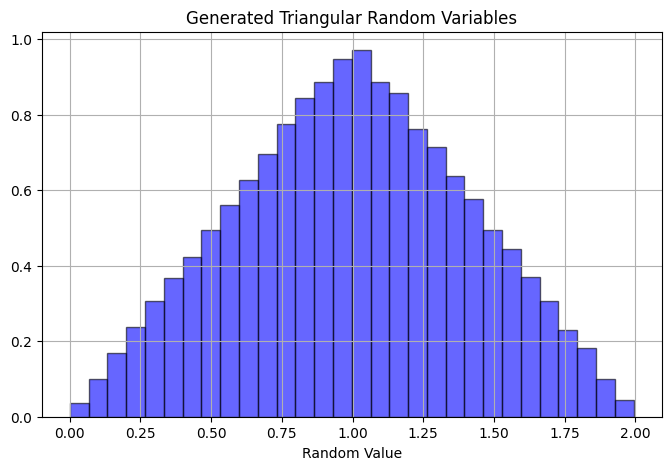

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt

def triangular_random_variate():
    """Generates a random variate using the inverse transform method."""
    U = random.uniform(0, 1)
    if U < 0.5:
        return np.sqrt(2 * U)
    else:
        return 2 - np.sqrt(2 - (2 * U))

# Generate sample values
samples = [triangular_random_variate() for _ in range(100000)]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Random Value')
plt.title('Generated Triangular Random Variables')
plt.grid()
plt.show()


In [39]:
def interview_simulation_strict(num_candidates=10000, num_questions=3):
    """Simulates a large number of candidates selecting answers randomly, where success requires all correct answers."""
    
    success_scenario_1 = 0  # HR's answer is always correct
    success_scenario_2 = 0  # HR's answer is in a random location

    for _ in range(num_candidates):
        # Scenario 1: HR answer is always correct, candidate picks randomly for remaining 2
        guaranteed_correct = 1  # HR gives 1 guaranteed correct answer
        candidate_correct = sum(random.randint(1, 5) == 1 for _ in range(num_questions - 1))
        if candidate_correct + guaranteed_correct == num_questions - 1:  # Must get all 3 correct
            success_scenario_1 += 1

        # Scenario 2: HR's solution is randomly placed, candidate picks randomly for all 3
        candidate_correct = sum(random.randint(1, 5) == 1 for _ in range(num_questions))
        if candidate_correct == num_questions - 1:  # Must get all 3 correct
            success_scenario_2 += 1

    # Compute probabilities
    prob_scenario_1 = success_scenario_1 / num_candidates
    prob_scenario_2 = success_scenario_2 / num_candidates

    return prob_scenario_1, prob_scenario_2

# Run the strict success criteria simulation
prob_1_strict, prob_2_strict = interview_simulation_strict()

# Display results
df_strict_simulation = pd.DataFrame({
    "Scenario": ["HR Always Correct", "HR Answer Randomly Placed"],
    "Probability of Passing (2/3 Correct)": [prob_1_strict, prob_2_strict]
})

df_strict_simulation

,Scenario,Probability of Passing (2/3 Correct)
0,HR Always Correct,0.3218
1,HR Answer Randomly Placed,0.0984


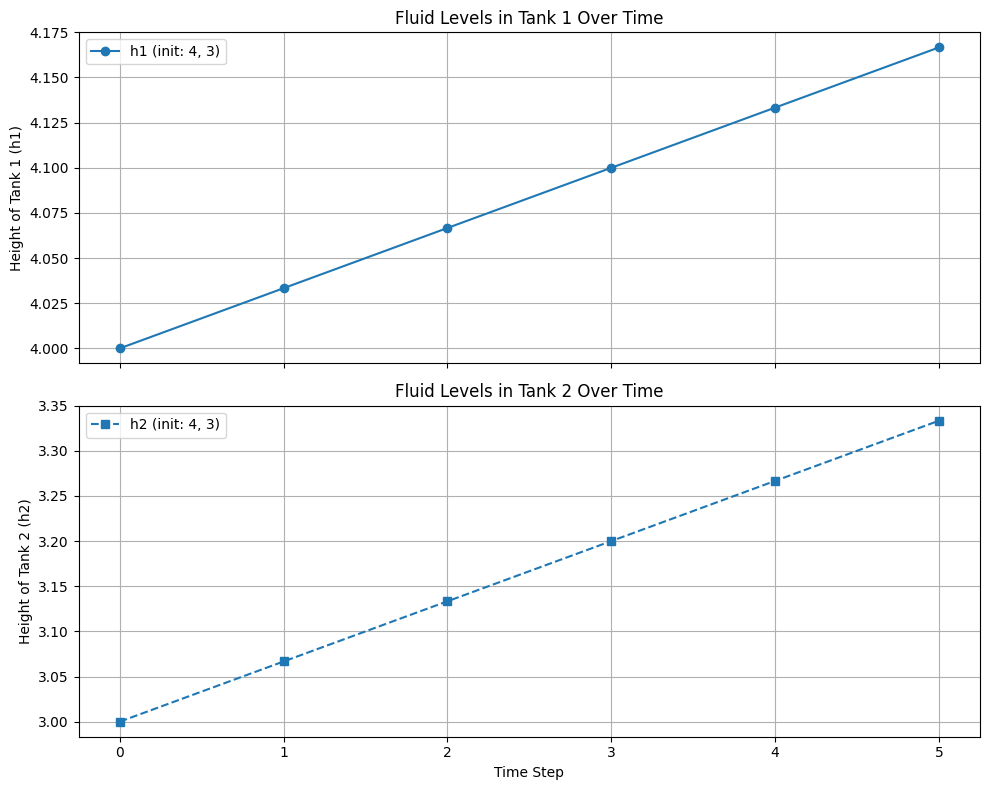

In [22]:
# Re-import necessary libraries after execution reset
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
A1 = 6.0
A2 = 3.0
F0 = 0.1
F1 = 0.5
F2 = 0.3

# Initial conditions to test
initial_conditions = [(4, 3)]

# Simulation parameters
time_steps = 5  # Number of iterations

# Store results for each initial condition
results = {}

for h10, h20 in initial_conditions:
    h1_vals = [h10]
    h2_vals = [h20]

    h1 = h10
    h2 = h20

    for _ in range(time_steps):
        delta_h1 = (F1 - F2) / A1
        delta_h2 = (F2 - F0) / A2

        h1 += delta_h1
        h2 += delta_h2

        h1_vals.append(h1)
        h2_vals.append(h2)

    results[(h10, h20)] = (h1_vals, h2_vals)

# Improved visualization: Separate subplots for better clarity

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

for (h10, h20), (h1_vals, h2_vals) in results.items():
    ax[0].plot(h1_vals, label=f'h1 (init: {h10}, {h20})', linestyle="-", marker="o")
    ax[1].plot(h2_vals, label=f'h2 (init: {h10}, {h20})', linestyle="--", marker="s")

ax[0].set_ylabel('Height of Tank 1 (h1)')
ax[0].set_title('Fluid Levels in Tank 1 Over Time')
ax[0].legend()
ax[0].grid()

ax[1].set_ylabel('Height of Tank 2 (h2)')
ax[1].set_title('Fluid Levels in Tank 2 Over Time')
ax[1].set_xlabel('Time Step')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()
